In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
children = pd.read_csv('coursework_1_data_2019.csv')
children.info()
children.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [3]:
children['obe_pop_cha']=children['2018_cases_total']-children['2008_cases_total']
children.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,obe_pop_cha
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,139000,21000,22000,18000,41000,18000,19000,London,london_borough,170
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,220000,50000,17000,23000,74000,30000,26000,London,london_borough,234
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,167
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,38
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,56


In [52]:
children['Clean_air']=children['clean_air']/1000
children['Clean_environ']=children['clean_environ']/1000
children['Health_training']=children['health_training']/1000
children['School_awareness']=children['school_awareness']/1000
children['Media_awareness']=children['media_awareness']/1000
children['Sub_counselling']=children['sub_counselling']/1000

In [53]:
df=children.loc[:,['obe_pop_cha','Clean_air','Clean_environ','Health_training','School_awareness','Media_awareness','Sub_counselling']]
df.head()

,obe_pop_cha,Clean_air,Clean_environ,Health_training,School_awareness,Media_awareness,Sub_counselling
0,170,21.0000,22.0000,18.0000,41.0000,18.0000,19.0000
1,234,50.0000,17.0000,23.0000,74.0000,30.0000,26.0000
2,167,41.0000,45.0000,5.0000,26.0000,29.0000,14.0000
3,38,33.0000,42.0000,19.0000,50.0000,10.0000,7.0000
4,56,37.0000,52.0000,17.0000,8.0000,3.0000,13.0000


In [67]:
df0=df[~df['Clean_air'].isin([0])]
df0.head()

,obe_pop_cha,Clean_air,Clean_environ,Health_training,School_awareness,Media_awareness,Sub_counselling
0,170,21.0000,22.0000,18.0000,41.0000,18.0000,19.0000
1,234,50.0000,17.0000,23.0000,74.0000,30.0000,26.0000
2,167,41.0000,45.0000,5.0000,26.0000,29.0000,14.0000
3,38,33.0000,42.0000,19.0000,50.0000,10.0000,7.0000
4,56,37.0000,52.0000,17.0000,8.0000,3.0000,13.0000


In [56]:
df0.corr()

,obe_pop_cha,Clean_air,Clean_environ,Health_training,School_awareness,Media_awareness,Sub_counselling
obe_pop_cha,1.0000,0.6756,0.6927,0.6439,0.5602,0.6631,0.7282
Clean_air,0.6756,1.0000,0.7138,0.6547,0.7411,0.5993,0.7494
Clean_environ,0.6927,0.7138,1.0000,0.6354,0.6528,0.6774,0.7331
Health_training,0.6439,0.6547,0.6354,1.0000,0.6176,0.6869,0.7128
School_awareness,0.5602,0.7411,0.6528,0.6176,1.0000,0.6556,0.6840
Media_awareness,0.6631,0.5993,0.6774,0.6869,0.6556,1.0000,0.7010
Sub_counselling,0.7282,0.7494,0.7331,0.7128,0.6840,0.7010,1.0000


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

X =add_constant(df0)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                                                2.8617
obe_pop_cha                                          2.6962
Clean_air                                            3.3875
Clean_environ                                        2.8900
Health_training                                      2.5291
School_awareness                                     2.7373
Media_awareness                                      2.7484
Sub_counselling                                      3.6361
dtype: float64

In [68]:
model = sm.formula.ols('obe_pop_cha ~ Clean_air  +Clean_environ+ Health_training  + School_awareness + Media_awareness +Sub_counselling ', df0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            obe_pop_cha   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     40.71
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.05e-28
Time:                        10:08:34   Log-Likelihood:                -913.91
No. Observations:                 151   AIC:                             1842.
Df Residuals:                     144   BIC:                             1863.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.2061     14.147      2.701      0.008      10.243      66.170
Clean_air            0.7008      0.288      2.437      0.016       0.132       1.269
Clean_environ        0.5685      0.231      2.464      0.015       0.112       1.025
Health_training      0.8015      0.596      1.344      0.181      -0.377       1.980
School_awareness    -0.4104      0.256     -1.601      0.112      -0.917       0.096
Media_awareness      1.1748      0.467      2.518      0.013       0.253       2.097
Sub_counselling      2.3713      0.804      2.951      0.004       0.783       3.960
==============================================================================
Omnibus:                       20.784   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.760
Skew:                           0.648   Prob(JB):                     6.32e-09
Kurtosis:                       5.078   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model = sm.formula.ols('obe_pop_cha ~ Clean_air  + Clean_environ + Media_awareness +Sub_counselling', df0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            obe_pop_cha   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     59.15
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.33e-29
Time:                        09:49:13   Log-Likelihood:                -916.06
No. Observations:                 151   AIC:                             1842.
Df Residuals:                     146   BIC:                             1857.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          37.2575     13.965      2.668      0.008       9.658      64.857
Clean_air           0.5799      0.261      2.224      0.028       0.065       1.095
Clean_environ       0.5582      0.231      2.412      0.017       0.101       1.016
Media_awareness     1.1767      0.432      2.725      0.007       0.323       2.030
Sub_counselling     2.5173      0.780      3.226      0.002       0.975       4.059
==============================================================================
Omnibus:                       21.313   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.918
Skew:                           0.562   Prob(JB):                     1.45e-11
Kurtosis:                       5.582   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

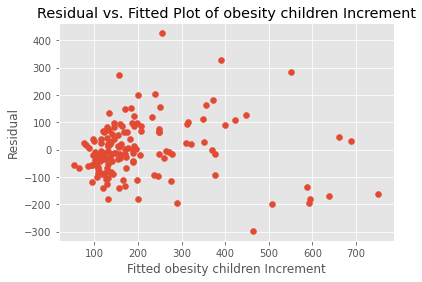

In [69]:
# plot 
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted obesity children Increment')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity children Increment')
plt.show()

In [ ]:
model.resid

In [62]:
df_final=df0.drop([92,126],axis=0)

In [65]:
model = sm.formula.ols('obe_pop_cha ~ Clean_air  + Clean_environ + Media_awareness +Sub_counselling', df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            obe_pop_cha   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     76.25
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.38e-34
Time:                        09:53:00   Log-Likelihood:                -887.91
No. Observations:                 149   AIC:                             1786.
Df Residuals:                     144   BIC:                             1801.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.9627     12.670      2.286      0.024       3.919      54.006
Clean_air           0.5893      0.241      2.443      0.016       0.112       1.066
Clean_environ       0.5928      0.211      2.805      0.006       0.175       1.010
Media_awareness     1.5326      0.392      3.907      0.000       0.757       2.308
Sub_counselling     2.2133      0.723      3.063      0.003       0.785       3.641
==============================================================================
Omnibus:                       11.016   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.959
Skew:                           0.503   Prob(JB):                      0.00153
Kurtosis:                       4.038   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""